<a href="https://colab.research.google.com/github/2203a5200/daup_2002/blob/main/2203A52002_Fashion_MNIST__DAUP__IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

zip_path = '/content/fashion_mnist_rearranged.zip'
extract_path = '/content/fashion_mnist_dataset'

# Check if valid ZIP and extract
if zipfile.is_zipfile(zip_path):
    print("✅ ZIP file is valid. Extracting now...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Extraction complete.")
else:
    print("❌ Invalid ZIP file. Please re-upload.")


✅ ZIP file is valid. Extracting now...
✅ Extraction complete.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
import numpy as np

# Path to extracted images
data_dir = os.path.join(extract_path, 'dataset')

# Image preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_generator, validation_data=val_generator, epochs=3)

# Evaluation
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n✅ Final Validation Accuracy: {val_acc:.2%}")

# Classification report
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)

print("\n📊 Classification Report:")
print(classification_report(val_generator.classes, y_pred, target_names=val_generator.class_indices.keys()))


Found 48000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.
Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7229 - loss: 0.7743 - val_accuracy: 0.8691 - val_loss: 0.3741
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.8572 - loss: 0.3905 - val_accuracy: 0.8837 - val_loss: 0.3228
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.8788 - loss: 0.3296 - val_accuracy: 0.8903 - val_loss: 0.3006
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.8906 - loss: 0.3011

✅ Final Validation Accuracy: 89.03%
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.10      0.10      1200
           1       0.10      0.10      0.10      1200
           2       0.10      0.12      0.11      1200
           3       0.09      0.10      0.09      1200
           4       0.11      0.10      0.10      1200
           5       

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


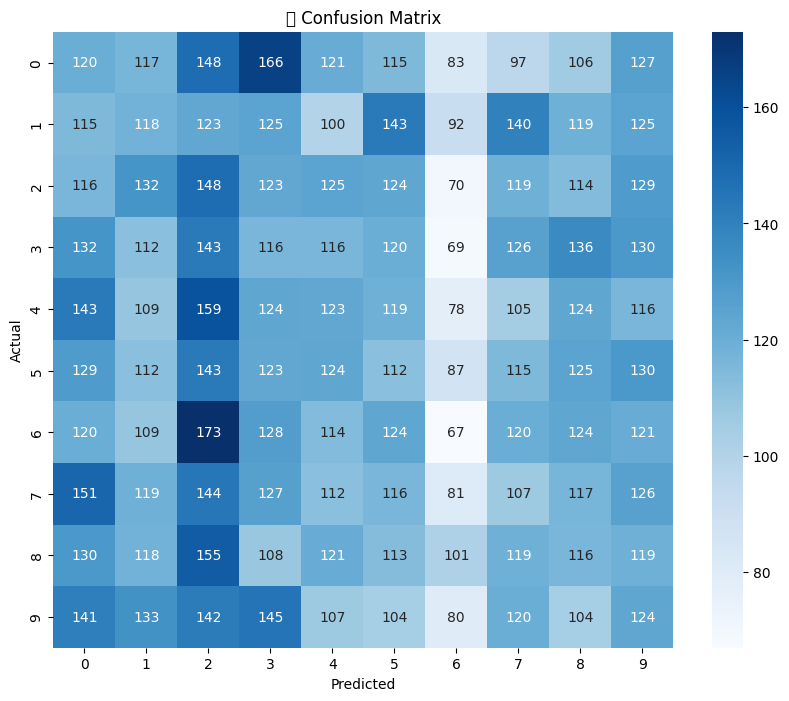

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import itertools

# --- Confusion Matrix ---
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title("🧩 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


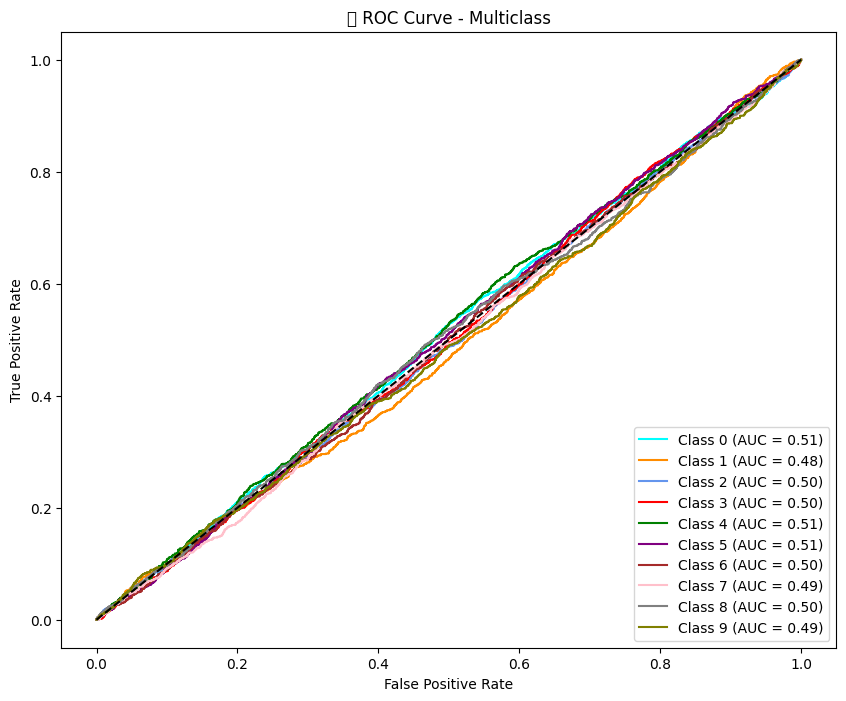

In [ ]:
# --- ROC Curve for Multiclass ---
n_classes = len(val_generator.class_indices)
y_true = label_binarize(val_generator.classes, classes=range(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Class {list(val_generator.class_indices.keys())[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("📈 ROC Curve - Multiclass")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


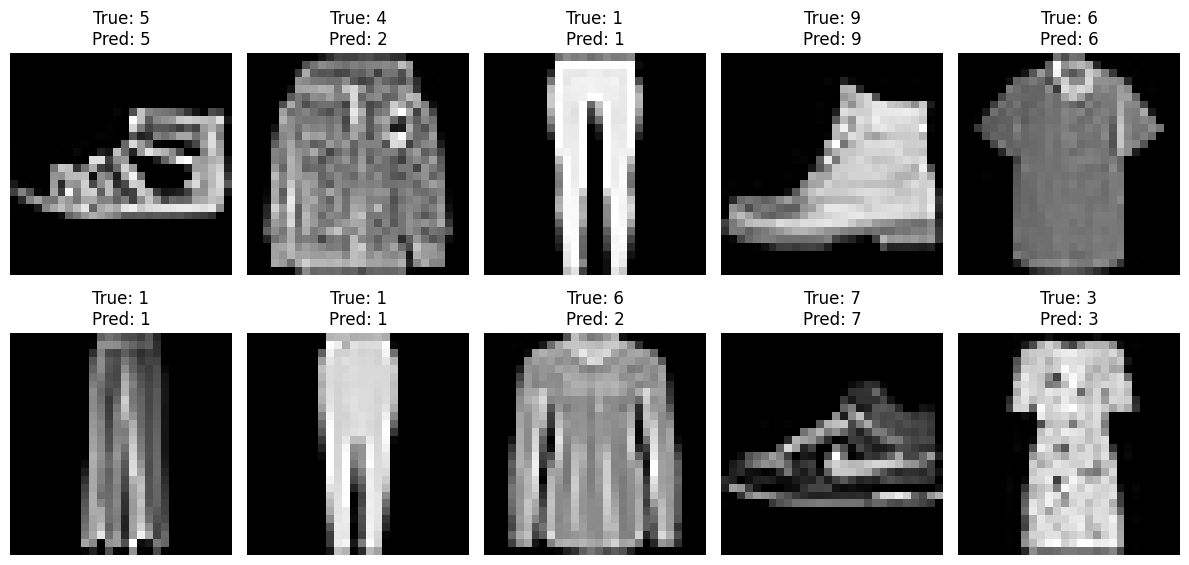

In [ ]:

# --- Show a few predictions with images ---
x_val, y_val = next(val_generator)
y_pred_sample = model.predict(x_val)
predicted_classes = np.argmax(y_pred_sample, axis=1)
true_classes = np.argmax(y_val, axis=1)
class_labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
